# 30 Day Chart Challenge

Source: http://www.donantesmalaga.org/donar/grupos-sanguineos

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("data/grupos_sanguineos.csv", sep=";")
df.head()

,Grupo,A quién puede donar,De quién puede recibir
0,A+,Puede donar a A+ y AB+,Puede recibir de A± y O±
1,A-,Puede donar a A± y AB±,Puede recibir de A- y O-
2,B+,Puede donar a B+ y AB+,Puede recibir de B± y O±
3,B-,Puede donar a B± y AB±,Puede recibir de B- y O-
4,AB+,Puede donar a AB+,Receptor universal


In [8]:
import networkx as nx


In [9]:
G = nx.DiGraph()
G

In [10]:
blood_types = ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]
G.add_nodes_from(blood_types)

In [11]:
donations = {
    "A+": ["A+", "AB+"],
    "A-": ["A+", "A-", "AB+", "AB-"],
    "B+": ["B+", "AB+"],
    "B-": ["B+", "B-", "AB+", "AB-"],
    "AB+": ["AB+"],
    "AB-": ["AB+", "AB-"],
    "O+": ["A+", "B+", "AB+", "O+"],
    "O-": ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]
}

donations

{'A+': ['A+', 'AB+'],
 'A-': ['A+', 'A-', 'AB+', 'AB-'],
 'B+': ['B+', 'AB+'],
 'B-': ['B+', 'B-', 'AB+', 'AB-'],
 'AB+': ['AB+'],
 'AB-': ['AB+', 'AB-'],
 'O+': ['A+', 'B+', 'AB+', 'O+'],
 'O-': ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']}

In [12]:
for donor, recipients in donations.items():
    for recipient in recipients:
        G.add_edge(donor, recipient)

In [13]:
in_degrees = dict(G.in_degree())
node_sizes = [in_degrees[node] * 400 + 600 for node in G]

In [14]:
sorted_nodes = sorted(G.nodes(), key=lambda x: in_degrees[x], reverse=True)


In [15]:
import numpy as np

pos = {}
step_height = 1.4 / len(sorted_nodes)  # Ajustar la altura entre escalones
for i, node in enumerate(sorted_nodes):
    angle = np.pi/2 - i * 2 * np.pi / len(sorted_nodes)
    pos[node] = np.array([np.cos(angle), np.sin(angle) + i * step_height])

In [16]:
pos

{'AB+': array([6.123234e-17, 1.000000e+00]),
 'A+': array([0.70710678, 0.88210678]),
 'B+': array([1.  , 0.35]),
 'AB-': array([ 0.70710678, -0.18210678]),
 'A-': array([ 6.123234e-17, -3.000000e-01]),
 'B-': array([-0.70710678,  0.16789322]),
 'O+': array([-1.  ,  1.05]),
 'O-': array([-0.70710678,  1.93210678])}

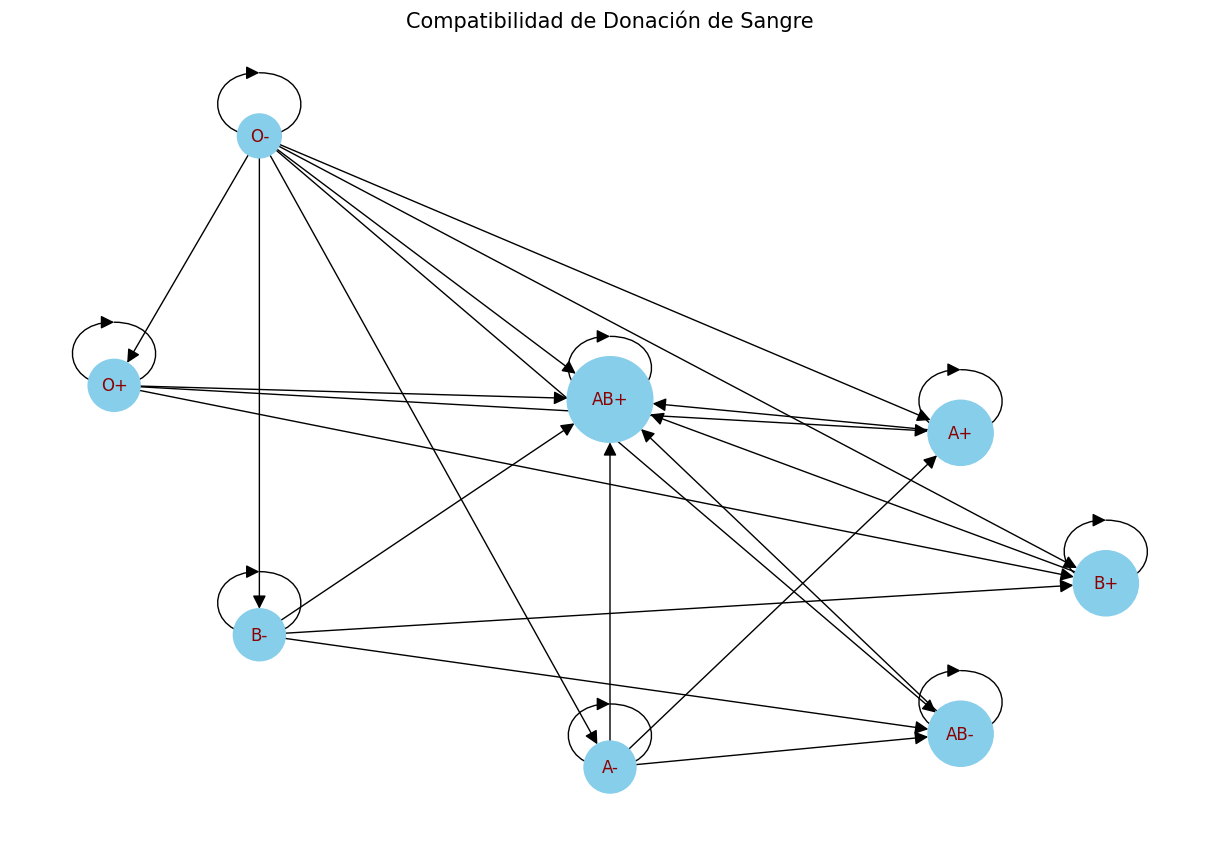

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=node_sizes, arrowstyle='-|>', arrowsize=20, font_size=12, font_color='darkred')
plt.title("Compatibilidad de Donación de Sangre", size=15)
plt.show()